In [3]:
# Load libraries
options(warn=-1)
source('../code/scMerge_helperFunctions.R')
suppressPackageStartupMessages(library(SingleCellExperiment))
require(scMerge)
require(BiocParallel)
require(ggpubr)


In [4]:
fres <- readRDS('../../data/tmp_scMerge.RDS')

In [5]:
#  str(fres)

# Bridging Controls Multi-variate ANOVA Before & After Normalization

In order to determine if batch effects exist, the bridging controls can be used since they are approximately equally-distributed across both batches and are designed to serve as controls for the studies. 

The analyses below use multi-variate ANOVAs and graphical visualizations (i.e., PCA, T-SNE, and UMAP) to compare scMerge's normalization and batch correction. 

## Before Normalization M-ANOVA
To quantify the effect of batch effects on the scRNA samples, we can run a PCA on the gene expression and then take the 1st 5 components as "Y"-variables to predict against. And then, we can quantify how much the batch effect is "effective" at predicting the principal components (or a linear combination of the most varying genes). 

The formula below (in R-speak), runs a multi-variate anova against celltypes, batches, and celltype X batch interction

```cbind(PC1,PC2,PC3,PC4,PC5) ~ as.factor(cellType)*as.factor(batch)```

and the summaries of the M-anova are displayed indicating degrees of freedom 

In [10]:
NumComponents=30
tmp <- fres$sce_object

BC.prior = scater::runPCA(tmp, exprs_values = "logcpm",ncomponents=NumComponents); 
PCs.prior<-data.frame(cbind(reducedDim(BC.prior),
                            "cellType"=colData(tmp)$cellType,"batch"=colData(tmp)$batch))
PCs.prior[,1:NumComponents]<-apply(PCs.prior[,1:NumComponents],2
                                   ,function(x){as.numeric(as.character(x))})


In [13]:
op <- options(contrasts = c("contr.helmert", "contr.poly"))
maov.prior<-manova(cbind(PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,
                        PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,
                        PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30) ~ as.factor(cellType)*as.factor(batch),
                   data=PCs.prior)
# maov.prior

# cat('\n\n\n\n\n\n')
summary(maov.prior, test ='Pillai')

                                       Df Pillai approx F num Df den Df
as.factor(cellType)                    12 4.3658  184.047    360 115860
as.factor(batch)                        1 0.2341   98.250     30   9644
as.factor(cellType):as.factor(batch)   12 0.2307    6.307    360 115860
Residuals                            9673                              
                                        Pr(>F)    
as.factor(cellType)                  < 2.2e-16 ***
as.factor(batch)                     < 2.2e-16 ***
as.factor(cellType):as.factor(batch) < 2.2e-16 ***
Residuals                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Before Normalization PCA 

Similarly, the cells below compare the 1st two principal components, coloring them by cell type and batch, respectively. 

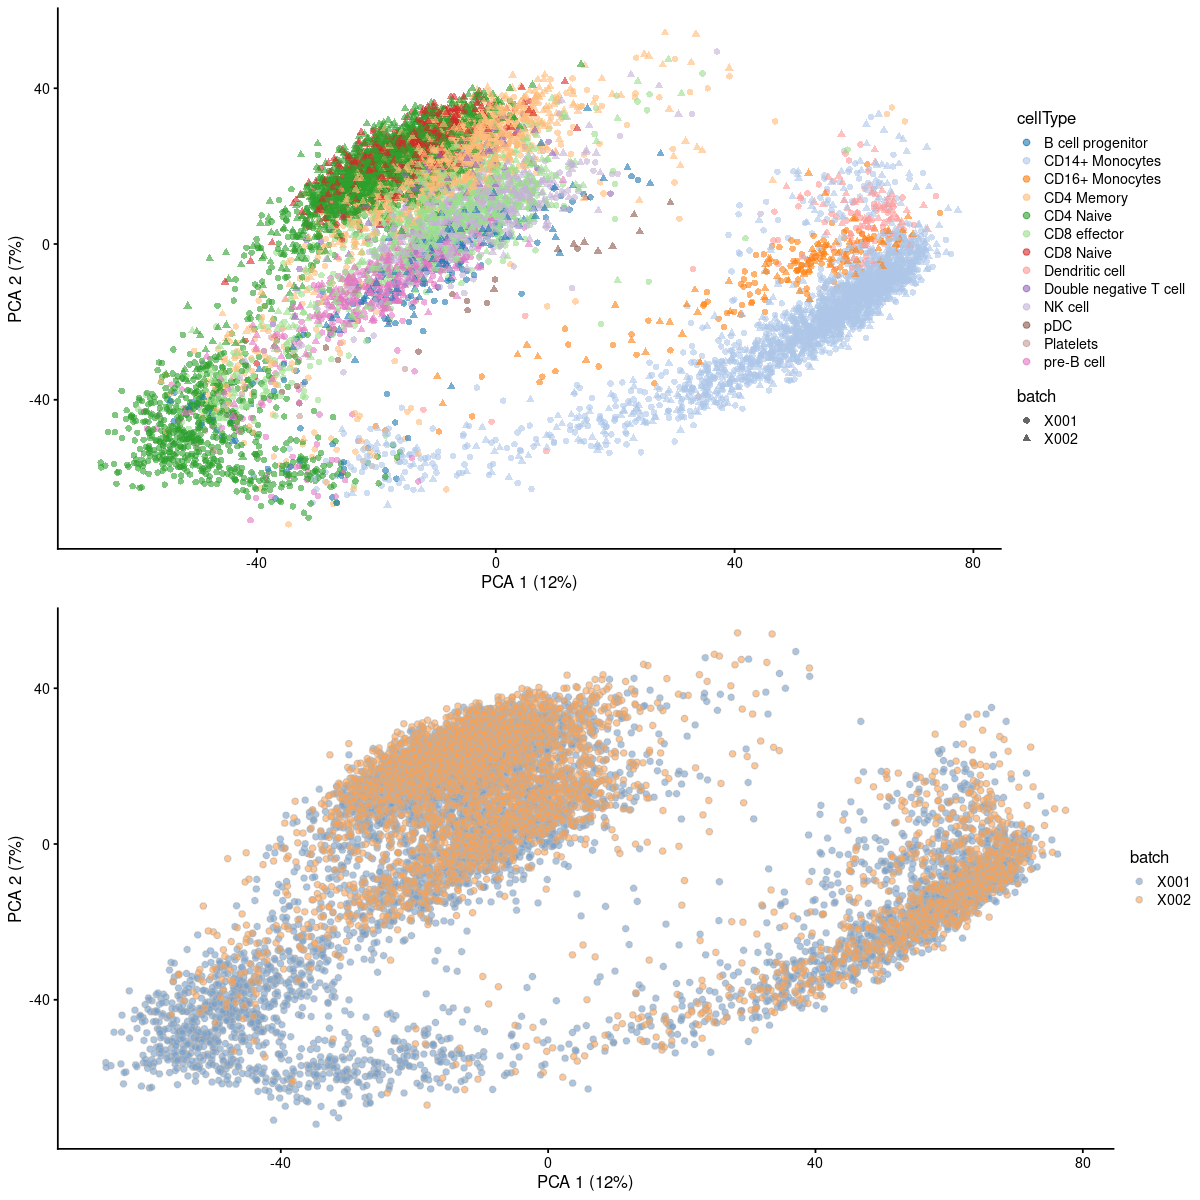

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
p1<-scater::plotPCA(BC.prior, colour_by = "cellType", shape_by = "batch")
p2<-scater::plotPCA(BC.prior, colour_by = "batch")
ggarrange(p1,p2, ncol=1)

## After Normalization: M-ANOVA

The normalization effect 

In [16]:
BC.post = scater::runPCA(tmp, exprs_values = "normalized",ncomponents=NumComponents); 
PCs.post<-data.frame(cbind(reducedDim(BC.post),"cellType"=colData(tmp)$cellType,"batch"=colData(tmp)$batch))
PCs.post[,1:NumComponents]<-apply(PCs.post[,1:NumComponents],2,function(x){as.numeric(as.character(x))})
op <- options(contrasts = c("contr.helmert", "contr.poly"))
maov.post<-manova(cbind(PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,
                        PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,
                        PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30) ~ as.factor(cellType)*as.factor(batch),
                    data=PCs.post)
summary(maov.post, test='Pillai')
# cat('\n\n\n\n\n')

# maov.post[['coefficients']]

                                       Df Pillai approx F num Df den Df
as.factor(cellType)                    12 4.4090  186.928    360 115860
as.factor(batch)                        1 0.2073   84.074     30   9644
as.factor(cellType):as.factor(batch)   12 0.2279    6.231    360 115860
Residuals                            9673                              
                                        Pr(>F)    
as.factor(cellType)                  < 2.2e-16 ***
as.factor(batch)                     < 2.2e-16 ***
as.factor(cellType):as.factor(batch) < 2.2e-16 ***
Residuals                                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## After Normalization PCA

The 1st two principal components are then plotted 

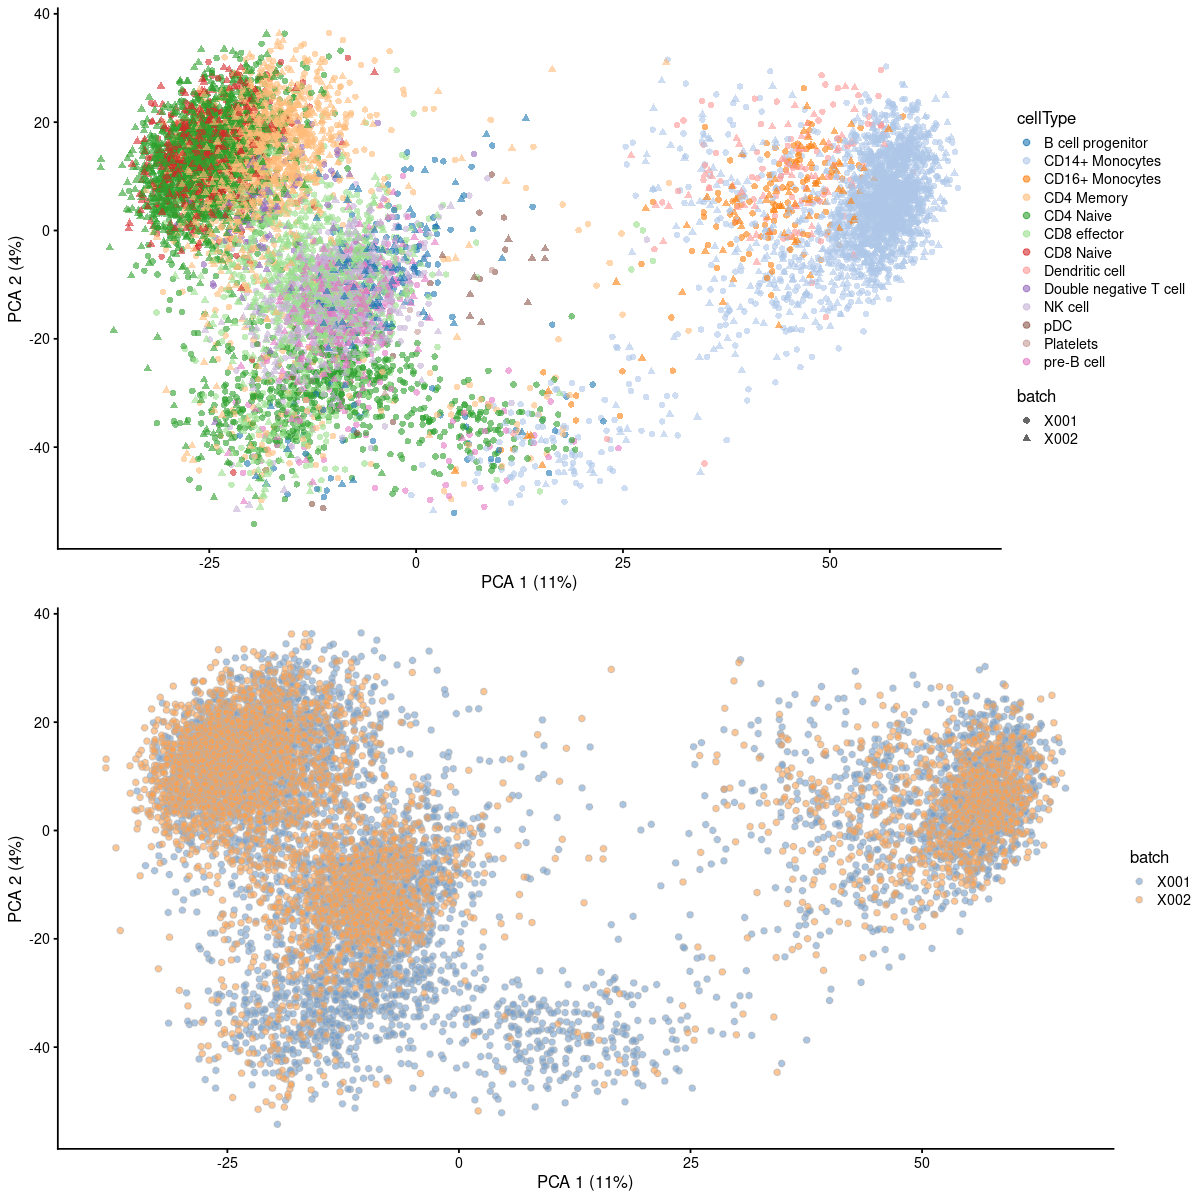

In [17]:
options(repr.plot.width=10, repr.plot.height=10)

p1<-scater::plotPCA(BC.post, colour_by = "cellType", shape_by = "batch")
p2<-scater::plotPCA(BC.post, colour_by = "batch")
ggarrange(p1,p2, ncol=1)

# T-SNE Plots

In [20]:
set.seed(1000)
BC.prior <- scater::runTSNE(BC.prior, perplexity=50, dimred="PCA", exprs_values = "logcpm",  n_dimred=NumComponents)

p1<-scater::plotTSNE(BC.prior, colour_by = "cellType", shape_by = "batch")
p2<-scater::plotTSNE(BC.prior, colour_by = "batch")

BC.post <- scater::runTSNE(BC.post, perplexity=50, dimred="PCA", exprs_values = "normalized",  n_dimred=NumComponents)

p3<-scater::plotTSNE(BC.post, colour_by = "cellType", shape_by = "batch")
p4<-scater::plotTSNE(BC.post, colour_by = "batch")


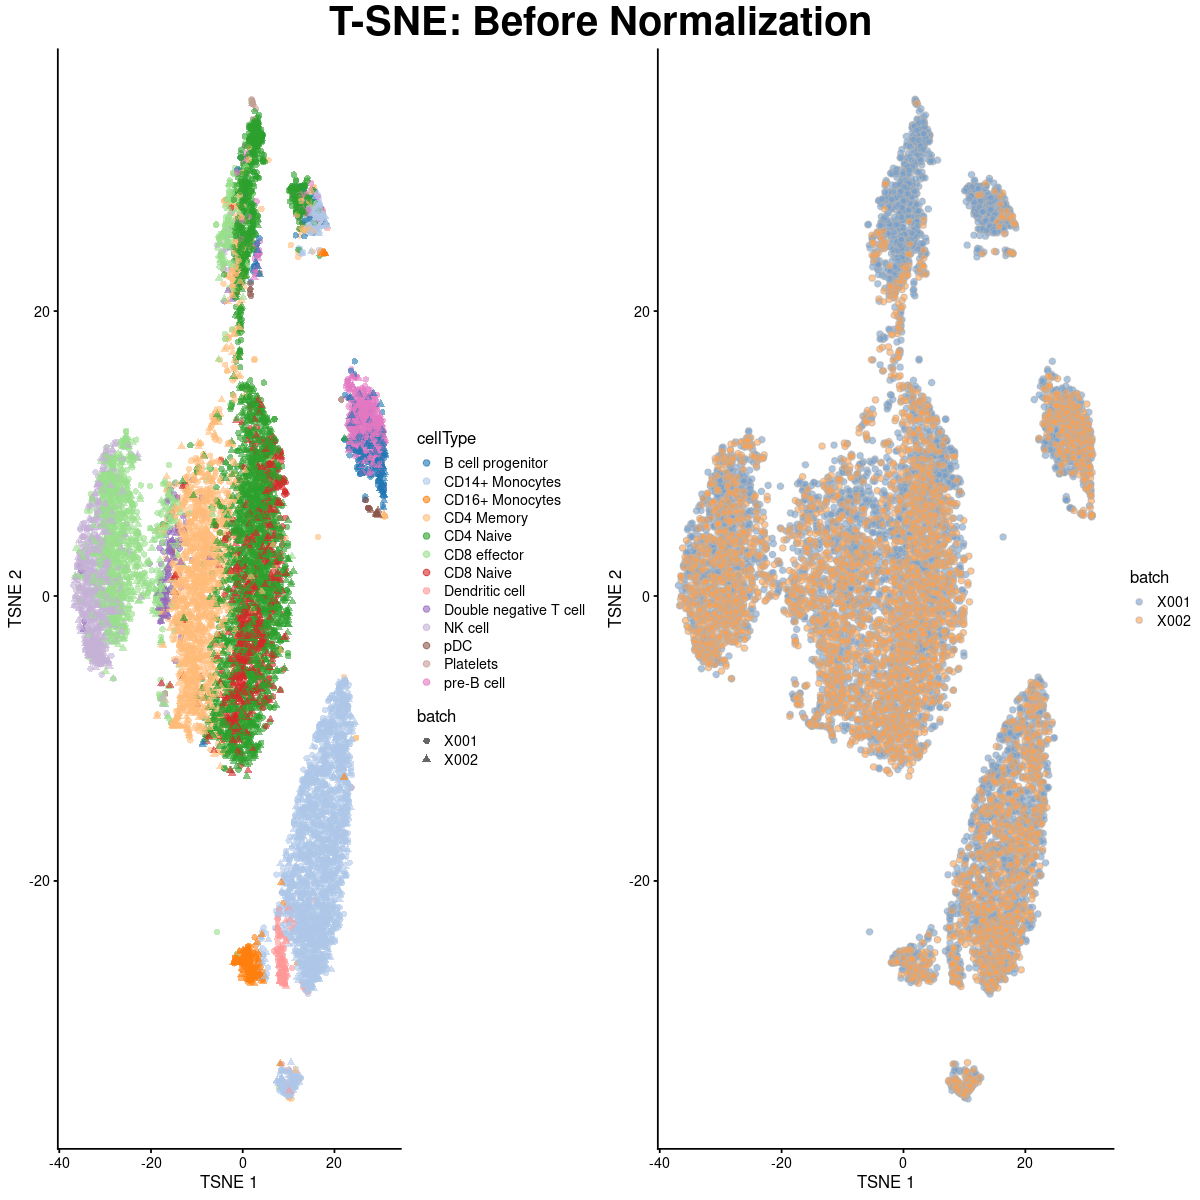

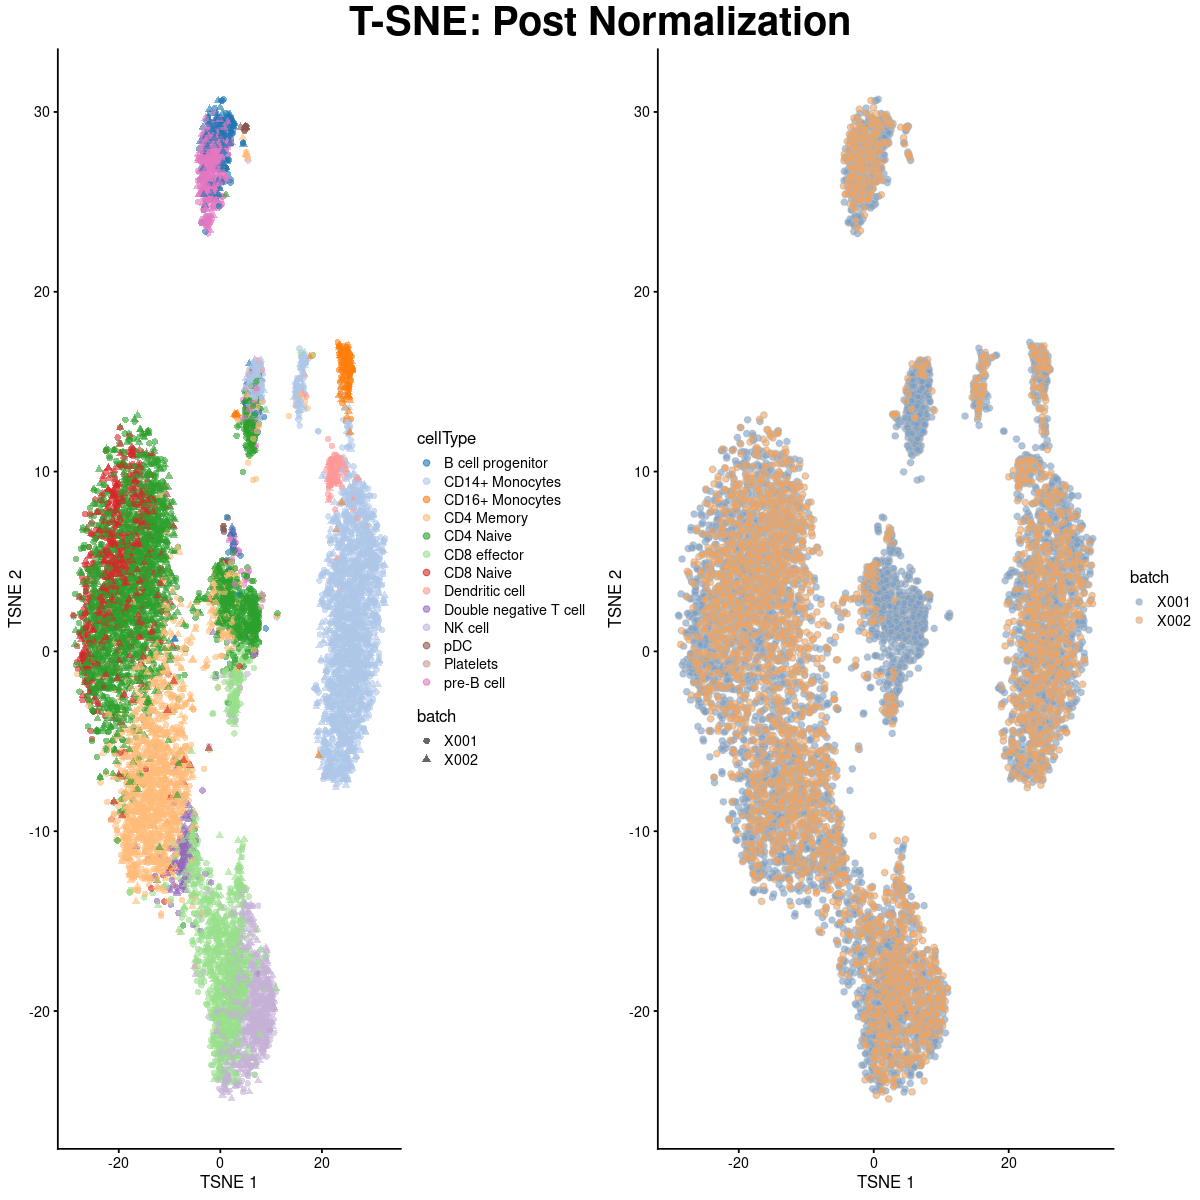

In [21]:
## Pre normalization
figure1 <- ggpubr::ggarrange(p1,p2, ncol=2) 
annotate_figure(figure1,
                top = text_grob("T-SNE: Before Normalization", color = "black", face = "bold", size = 24))

cat('\n\n')
figure2 <- ggpubr::ggarrange(p3,p4, ncol=2) 
annotate_figure(figure2,
                top = text_grob("T-SNE: Post Normalization", color = "black", face = "bold", size = 24))


# UMAP Plots

In [22]:
BC.prior <- scater::runUMAP(BC.prior,  exprs_values = "logcpm",  n_dimred=NumComponents)

p1<-scater::plotUMAP(BC.prior, colour_by = "cellType", shape_by = "batch")+ggtitle('Celltype X Batch')
p2<-scater::plotUMAP(BC.prior, colour_by = "batch") + ggtitle('Batch')

# BC.post <- scater::runUMAP(BC.post, exprs_values = "normalized") 
# p3<-scater::plotUMAP(BC.post, colour_by = "cellType", shape_by = "batch")
# p4<-scater::plotUMAP(BC.post, colour_by = "batch")

In [23]:
BC.post <- scater::runUMAP(BC.post, exprs_values = "normalized", n_dimred=NumComponents)
p3<-scater::plotUMAP(BC.post, colour_by = "cellType", shape_by = "batch")
p4<-scater::plotUMAP(BC.post, colour_by = "batch")

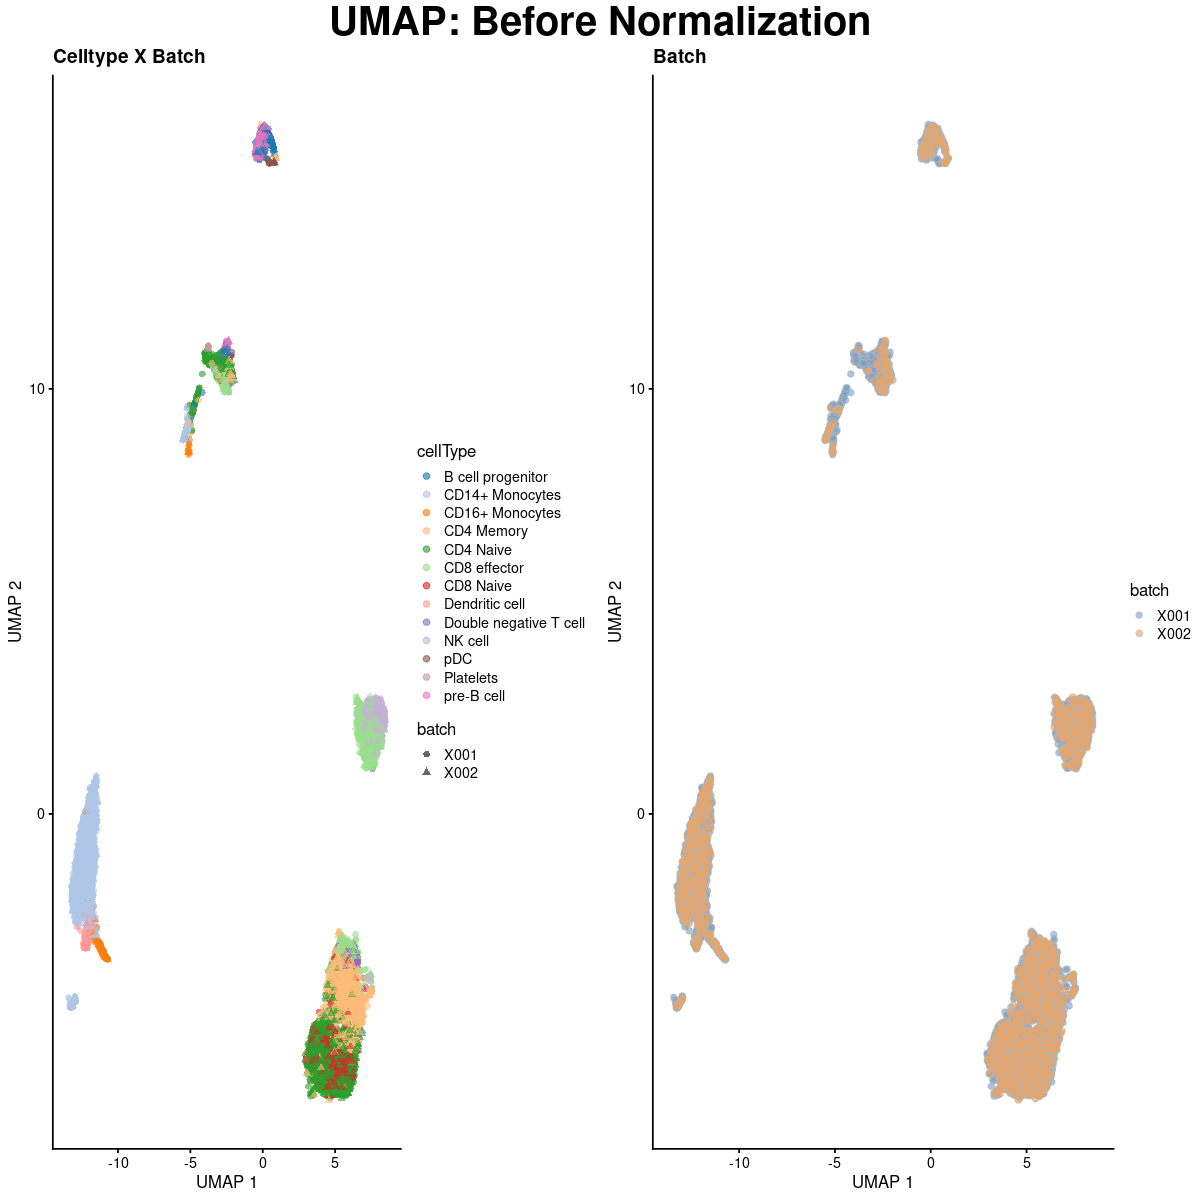

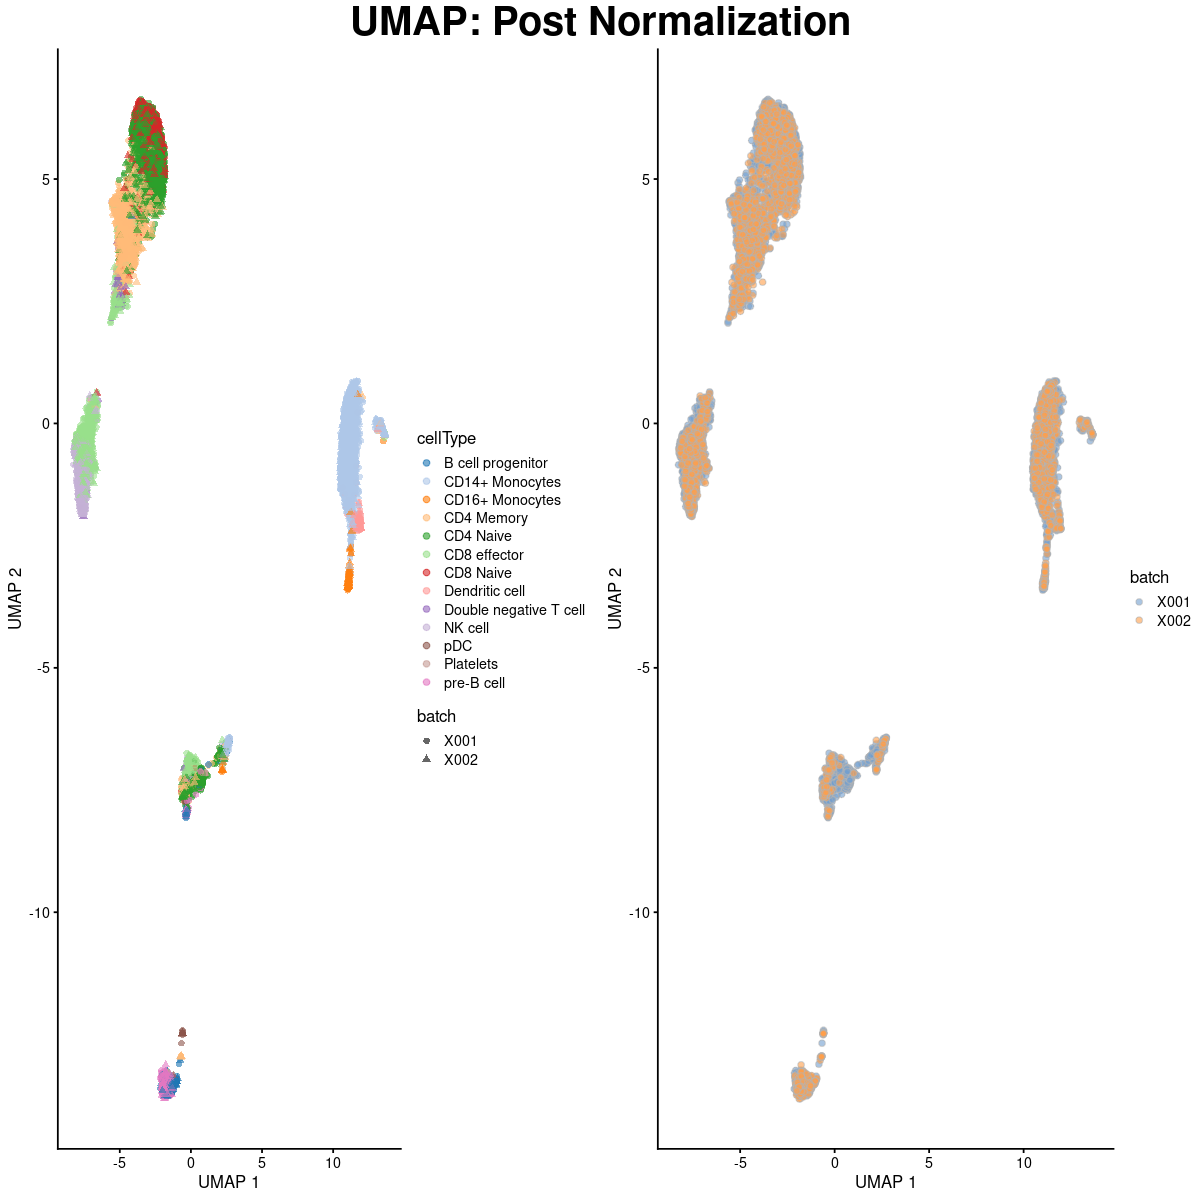

In [24]:
## Pre normalization
figure1 <- ggpubr::ggarrange(p1,p2, ncol=2) 
annotate_figure(figure1,
                top = text_grob("UMAP: Before Normalization", color = "black", face = "bold", size = 24))

cat('\n\n')
figure2 <- ggpubr::ggarrange(p3,p4, ncol=2) 
annotate_figure(figure2,
                top = text_grob("UMAP: Post Normalization", color = "black", face = "bold", size = 24))


## Proportion of Variance Explained by each Cell Type  
The section below estimates the proportion of variance explained by each cell type. Unlike in the previous analyses above, where the m-anova was testing if there was a difference of means across each celltypes, here each celltype is tested specifically to assess its "contribution" 
towards explaining a proportion of variance. 

The analyses below show a multivariate anova (m-anova) before and after normalization to 

- 1.) Ensure batch effects are reduced
- 2.) Biological effects are not 

In [25]:
########################################################################################
#########  VARIATION ACCOUNTED BY EACH CELL TYPE #######################################
#########  Each cell of the "Terms:" divided by the sum of the corresponding row #######
#########  gives an unbiased estimate of the proportion of variance explained by #######
#########  that predictor in the model.#################################################
########################################################################################

# Prepare the data 

cellType=unique(colData(tmp)$cellType)

PCs.prior.wide<-PCs.prior
PCs.post.wide<-PCs.post
for(i in 1:length(cellType)){
  k<-ncol(PCs.prior.wide)+1
  PCs.prior.wide[,paste(trimws(cellType[i]))]<-PCs.post.wide[,paste(trimws(cellType[i]))]<-0
  ct.idx<-which(PCs.prior.wide$cellType==cellType[i])
  PCs.prior.wide[ct.idx,paste0(cellType[i])]<-PCs.post.wide[ct.idx,paste0(cellType[i])]<-1
}


# Clean the column names 
colnames(PCs.prior.wide) <- gsub(" ", "", colnames(PCs.prior.wide))
colnames(PCs.prior.wide) <- gsub("-", "", colnames(PCs.prior.wide))
colnames(PCs.prior.wide)[colnames(PCs.prior.wide) %in% c("CD14+Monocytes","CD16+Monocytes")] <-c("CD14Monocytes" , "CD16Monocytes")
colnames(PCs.post.wide) <- gsub(" ", "", colnames(PCs.post.wide))
colnames(PCs.post.wide) <- gsub("-", "", colnames(PCs.post.wide))
colnames(PCs.post.wide)[colnames(PCs.post.wide) %in% c("CD14+Monocytes","CD16+Monocytes")] <-c("CD14Monocytes" , "CD16Monocytes")


The Pre- and Post- M-anova results below show how the proportion of variance ("approximate F") changes before and after normalization.

## Pre-Normalization M-Anova

In [47]:
op <- options(contrasts = c("contr.helmert", "contr.poly"))
frmla<-formula(paste("cbind(PC1,PC2,PC3,PC4,PC5) ~ ", paste0(colnames(PCs.prior.wide)[(NumComponents+3):(NumComponents+15)], collapse = " + ")," + batch"))
frmla
maov.prior<-manova(frmla,data=PCs.prior.wide)
summary(maov.prior)

cbind(PC1, PC2, PC3, PC4, PC5) ~ preBcell + CD8effector + CD4Naive + 
    CD14Monocytes + CD16Monocytes + CD4Memory + Dendriticcell + 
    Bcellprogenitor + DoublenegativeTcell + CD8Naive + Platelets + 
    NKcell + pDC + batch

                      Df  Pillai approx F num Df den Df    Pr(>F)    
preBcell               1 0.67918   4098.9      5   9681 < 2.2e-16 ***
CD8effector            1 0.77383   6624.6      5   9681 < 2.2e-16 ***
CD4Naive               1 0.77021   6489.9      5   9681 < 2.2e-16 ***
CD14Monocytes          1 0.27073    718.8      5   9681 < 2.2e-16 ***
CD16Monocytes          1 0.91005  19590.0      5   9681 < 2.2e-16 ***
CD4Memory              1 0.25924    677.6      5   9681 < 2.2e-16 ***
Dendriticcell          1 0.48004   1787.5      5   9681 < 2.2e-16 ***
Bcellprogenitor        1 0.53790   2253.8      5   9681 < 2.2e-16 ***
DoublenegativeTcell    1 0.00881     17.2      5   9681 < 2.2e-16 ***
CD8Naive               1 0.65148   3619.2      5   9681 < 2.2e-16 ***
Platelets              1 0.04274     86.5      5   9681 < 2.2e-16 ***
NKcell                 1 0.11738    257.5      5   9681 < 2.2e-16 ***
batch                  1 0.13003    289.4      5   9681 < 2.2e-16 ***
Residuals           

## Post-Normalization M-Anova
As can be seen, the test statistics on the batch effects are reduced from 289 to 187 (almost 50%), whereas the test statisics on the cell types remain fairly balanced. Indicating normalization has reduced (but not eliminated) the batch effects. 

In [49]:
# frmla<-formula(paste("cbind(PC1,PC2,PC3,PC4,PC5) ~ ", 
#                      paste0(colnames(PCs.post.wide)[(NumComponents+1):ncol(PCs.post.wide)], 
#                             collapse = " + ")," + batch"))

frmla<-formula(paste("cbind(PC1,PC2,PC3,PC4,PC5) ~ ", paste0(colnames(PCs.prior.wide)[(NumComponents+3):(NumComponents+15)], collapse = " + ")," + batch"))
# frmla
maov.post<-manova(frmla,data=PCs.post.wide)
summary(maov.post, test='Pillai')

                      Df  Pillai approx F num Df den Df    Pr(>F)    
preBcell               1 0.68050   4124.0      5   9681 < 2.2e-16 ***
CD8effector            1 0.78461   7053.0      5   9681 < 2.2e-16 ***
CD4Naive               1 0.78614   7117.4      5   9681 < 2.2e-16 ***
CD14Monocytes          1 0.25492    662.5      5   9681 < 2.2e-16 ***
CD16Monocytes          1 0.91060  19721.3      5   9681 < 2.2e-16 ***
CD4Memory              1 0.26004    680.4      5   9681 < 2.2e-16 ***
Dendriticcell          1 0.47581   1757.5      5   9681 < 2.2e-16 ***
Bcellprogenitor        1 0.54463   2315.7      5   9681 < 2.2e-16 ***
DoublenegativeTcell    1 0.07602    159.3      5   9681 < 2.2e-16 ***
CD8Naive               1 0.67298   3984.6      5   9681 < 2.2e-16 ***
Platelets              1 0.03888     78.3      5   9681 < 2.2e-16 ***
NKcell                 1 0.12583    278.7      5   9681 < 2.2e-16 ***
batch                  1 0.08821    187.3      5   9681 < 2.2e-16 ***
Residuals           

## A final note on p-values
In large sample sizes, small differences can lead to "significant" results, and when all results are "significant" interpretations and conclusions are ambiguous. A better way to interpret results in context is to look at test statistics and effect sizes. 

In M-ANOVA, the analysis is based on the product of the model and error variance matrix, $\Sigma_{model}, \Sigma_{Error}$. This product is defined below:

$$A = \Sigma_{model} \times \hspace{1mm} \Sigma_{Error}$$

and the associated test statistics in the M-ANOVA analyses are derived from calculations on A. One such statistic, the Pillai trace test statistic is bounded between [0,1,], with increasing values indicating the "level" of contribution to the model: 

$$\text{Pillai} = \Lambda_{Pillai} = \sum_{1, \cdots, p} \frac{\lambda_p}{1+\lambda_p} = \text{trace}(A (I+A)^{-1}) \hspace{10mm} \text{where } \Lambda_{Pillai} \in [0,1] $$

where 
- I denotes the identity matrix,
- $A = \Sigma_{model} \times \hspace{1mm} \Sigma_{Error}$, and 
- $\lambda_p$ is given by the roots or eigenvalues of A. 

What this does is provide a way to "rank" the contributions, similar to the approx F test statistics, and provide a comparative ranking of the celltypes. 

Since the batch effect's Pillai statistics is smaller than most cell types we can conclude that although it has a non-negligeable effect, it is not a dominant factor. 

In addition, a point to notice is that with rare cell types, we might not be getting numerically stable estimates of the effects and there make it challenging when there exist celltype X batch interactions. 


In [50]:
df = cbind(data.table::data.table(table(tmp$cellType)),
           round(summary(maov.post, test='Pillai')$stats[,2][1:13],3),
           round(summary(maov.post, test='Pillai')$stats[,3][1:13],1)
          )

colnames(df) <- c('Cell Type','Frequency','Pillai','Approx F')
df

Cell Type,Frequency,Pillai,Approx F
<chr>,<int>,<dbl>,<dbl>
B cell progenitor,242,0.681,4124.0
CD14+ Monocytes,2071,0.785,7053.0
CD16+ Monocytes,195,0.786,7117.4
CD4 Memory,1482,0.255,662.5
CD4 Naive,2447,0.911,19721.3
CD8 effector,1125,0.260,680.4
CD8 Naive,707,0.476,1757.5
Dendritic cell,137,0.545,2315.7
Double negative T cell,139,0.076,159.3


## Variance Partition 

Another way to assess batch effects and their "influence" on the entirety of the analysis is by doing variance decomposition and breaking down the variance into all the components of interest. 

Through the R/Bioconductor package *variancePartition*, we can break down the variance components of our gene expression data, and compare the percentage of variance explained by batch effects pre- and post-normalization. 

Via Linear Mixed Models, the components are broken down as either "fixed" or "random" effects in the linear model framework, and then their variance components are estimated using the lme4 R package. 

The formula below 

    varPartfrmla <- ~ cellType*batch
    
indicates that I want to decompose the entire variance by
- cellType 
- batch effect
- cellType X batch effect interaction

In [87]:
suppressPackageStartupMessages(library(variancePartition))

# head(tmp)
geneExpr_norm <- tmp@assays@data$normalized
geneExpr_logcpm <- tmp@assays@data$logcpm
info <- data.frame(tmp@colData)
info$cellType <- as.factor(info$cellType)
info$batch <- as.factor(info$batch)
# dim(geneExpr)
# dim(info)
# str(info)
# str(geneExpr)
# head(info)
# str(info)
varPartfrmla <- ~ cellType*batch
varPart_pre <- fitExtractVarPartModel( geneExpr_norm, varPartfrmla, info )
varPart_post <- fitExtractVarPartModel( geneExpr_logcpm, varPartfrmla, info )


Total:288 s


Total:339 s



In [88]:
vp1 <- sortCols( varPart_pre )
vp2 <- sortCols( varPart_post )


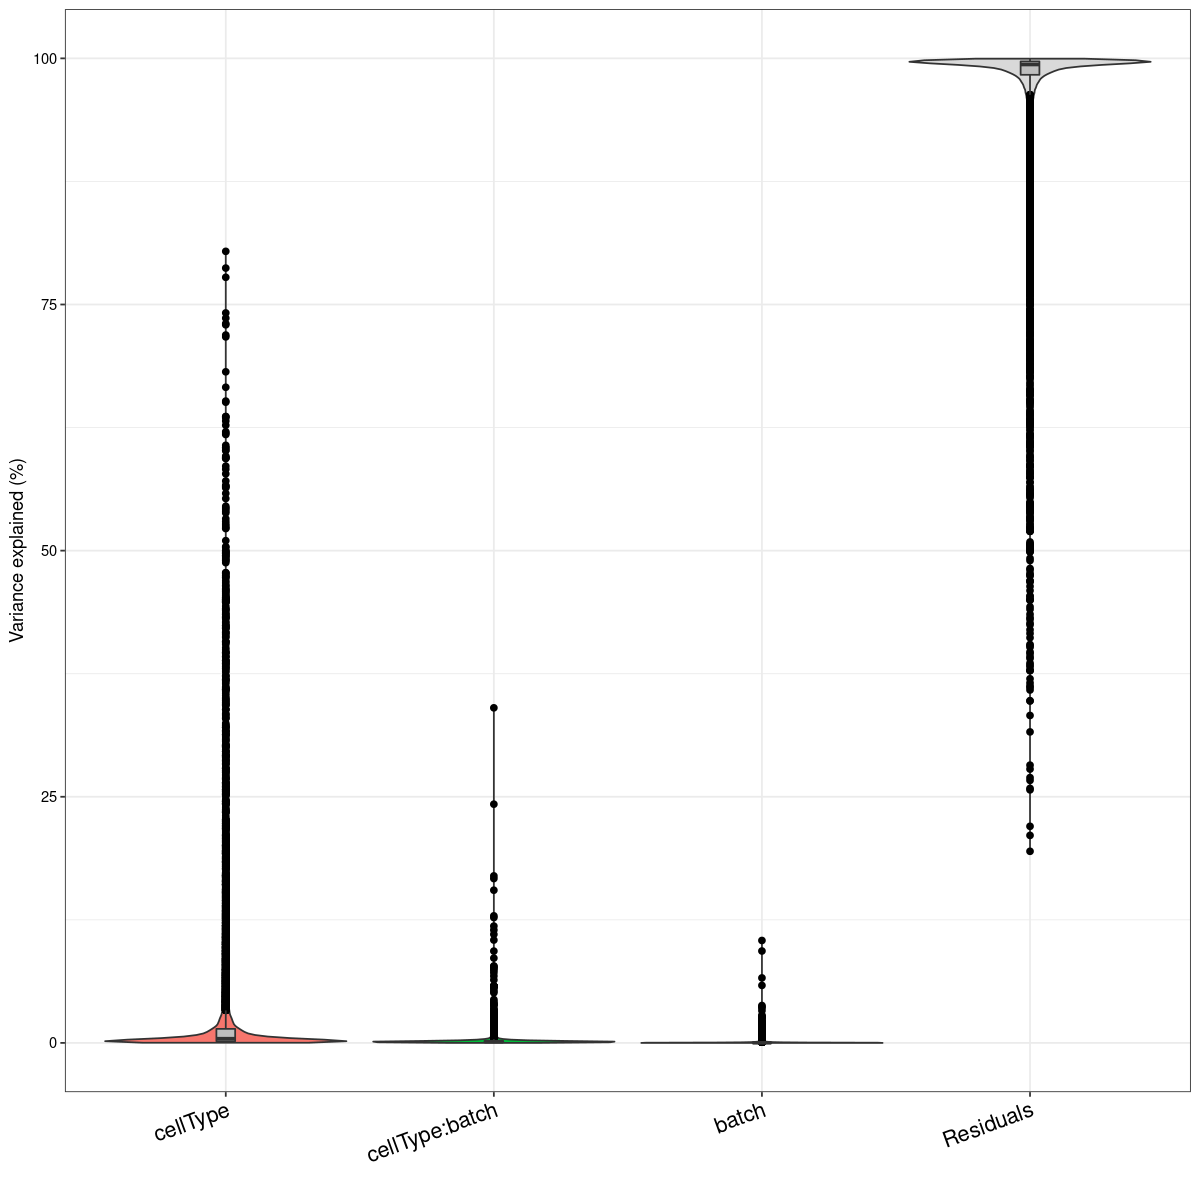

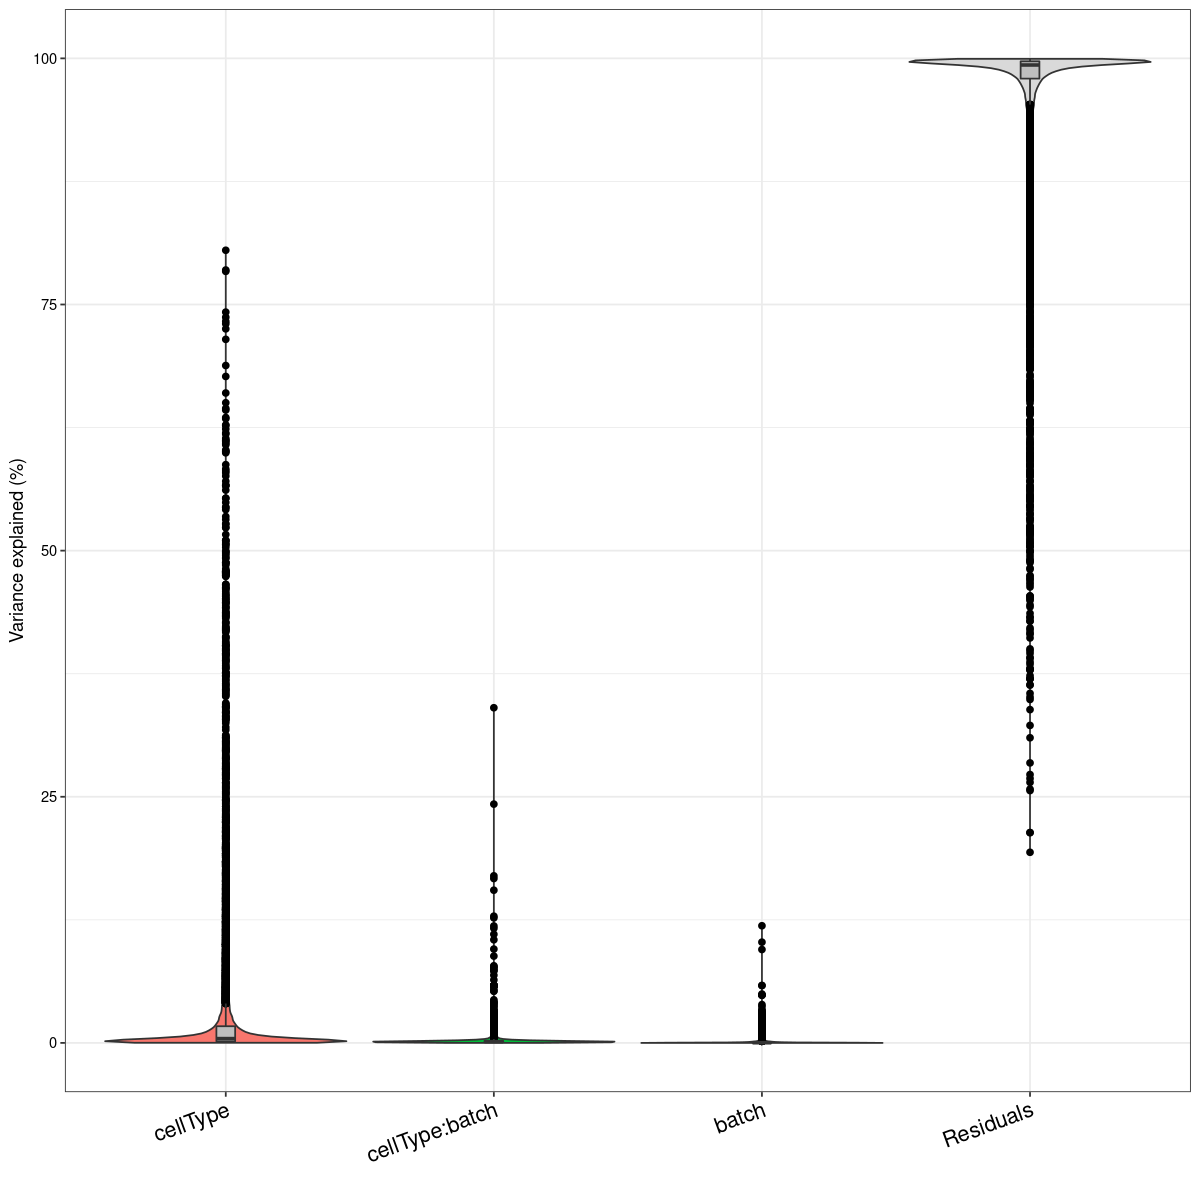

In [89]:
par(mfrow=c(1,2))
plotVarPart( vp1 )
plotVarPart( vp2 )

In [19]:
library(pvca)
source('../code//pvca.R')

# pct_threshold = 0.6

## PVCA library is "too slow"
# pre_eset <- ExpressionSet(as.matrix(assay(tmp,'logcpm')), data=info)
# post_eset<- ExpressionSet(as.matrix(assay(tmp,'normalized')), data=info)
# pvcaObj <- pvca::pvcaBatchAssess(pre_eset, batch.factors, pct_threshold)
# pvcaObjPost <- pvca::pvcaBatchAssess(pre_eset, batch.factors, pct_threshold)
tmp <- fres$sce_object
gdata <- data.frame(assay(tmp,'logcpm'))
head(gdata)
mdata <- info <- data.frame(tmp@colData)

head(mdata)
names(mdata)
names(gdata) <- gsub('X','', names(gdata))
names(gdata)[1:5]

,X263481,X263482,X263483,X263484,X263485,X263486,X263487,X263488,X263489,X263490,⋯,X518417,X518418,X518419,X518420,X518421,X518422,X518423,X518424,X518425,X518426
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000131043,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0.0000,⋯,0.000000,0,0,0.000000,0,0,0.000000,0,0.000000,0
ENSG00000161204,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0.0000,⋯,0.000000,0,0,0.000000,0,0,0.000000,0,0.000000,0
ENSG00000140526,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0.0000,⋯,0.000000,0,0,6.895759,0,0,0.000000,0,0.000000,0
ENSG00000146109,0,8.359013,0.000000,0,0,0,0.000000,0,0.000000,0.0000,⋯,0.000000,0,0,0.000000,0,0,0.000000,0,8.304507,0
ENSG00000114331,0,0.000000,7.510098,0,0,0,7.127143,0,8.060466,7.9011,⋯,7.643892,0,0,6.895759,0,0,0.000000,0,0.000000,0
ENSG00000112304,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0.0000,⋯,0.000000,0,0,0.000000,0,0,7.282653,0,0.000000,0


,barcodes,batch,cell_name,cell_uuid,chip_id,n_genes,n_reads,n_umis,pool_id,cellType,⋯,subjid,well_id,wk,Week,CDR,CDR.scaled,CDRlt1,CDRlt1.scaled,mito,propMito
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
263481,263481,X001,drafty_censual_cygnet,24bf0d9c108911eaa83e514fe8bdc185,C1,874,8110,2857,P1,pre-B cell,⋯,IMM19,W1,0,0,0.02605999,-0.8425624,0.9739400,0.8425624,74,0.025901295
263482,263482,X001,good_illogical_tuatara,24c4db0d108911eaa83e514fe8bdc185,C1,1154,8550,3055,P1,CD8 effector,⋯,IMM19,W1,0,0,0.03440873,-0.3755628,0.9655913,0.3755628,98,0.032078560
263483,263483,X001,blameless_expansive_brownbear,24c5d952108911eaa83e514fe8bdc185,C1,1232,16330,5516,P1,CD4 Naive,⋯,IMM19,W1,0,0,0.03673445,-0.2454701,0.9632655,0.2454701,46,0.008339376
263484,263484,X001,eccentric_aromatic_anglerfish,24c68932108911eaa83e514fe8bdc185,C1,1215,13634,4659,P1,pre-B cell,⋯,IMM19,W1,0,0,0.03622756,-0.2738237,0.9637724,0.2738237,142,0.030478643
263485,263485,X001,pleased_chancy_nutcracker,24c7e907108911eaa83e514fe8bdc185,C1,1116,10154,3488,P1,CD16+ Monocytes,⋯,IMM19,W1,0,0,0.03327569,-0.4389413,0.9667243,0.4389413,213,0.061066514
263486,263486,X001,ripening_renderable_ass,24cb6c85108911eaa83e514fe8bdc185,C1,519,3196,1238,P1,CD14+ Monocytes,⋯,IMM19,W1,0,0,0.01547498,-1.4346510,0.9845250,1.4346510,245,0.197899838


[1] "barcodes"               "batch"                  "cell_name"             
 [4] "cell_uuid"              "chip_id"                "n_genes"               
 [7] "n_reads"                "n_umis"                 "pool_id"               
[10] "cellType"               "seurat_pbmc_type_score" "subjid"                
[13] "well_id"                "wk"                     "Week"                  
[16] "CDR"                    "CDR.scaled"             "CDRlt1"                
[19] "CDRlt1.scaled"          "mito"                   "propMito"

[1] "263481" "263482" "263483" "263484" "263485"

In [ ]:
sid <- 'barcodes'
batch.factors <- c('cellType','batch')
threshold <- 0.8
interaction=T
test<-runPVCA(gdata=gdata, mdata=mdata, sid=sid, factors = batch.factors, 0.8, T)

In [ ]:
PlotPVCA(test, "PVCA")

# bp <- barplot(pvcaObj$dat, xlab='effects',
#               ylab='weighted avg', 
#               ylim=c(0, 1.1), 
#               col='blue', las=2, 
#               main='pvca estimation')

# bp_post <- barplot(pvcaObjPost$dat, xlab='effects',
#               ylab='weighted avg', 
#               ylim=c(0, 1.1), 
#               col='blue', las=2, 
#               main='pvca estimation')

# bp
# bp_post 

In [1]:

#### look at 
ls()



character(0)